## Домашнее задание А.Николаев

### Задача №1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

### Ответ

а - это временной ряд. Если взять группы похожих квартир, то изменение цены такой группы во времени могут быть изменеррны через равные промежутки времени. Цена конкретной квартиры - тоже временной ряд, но временной отрезок маленький, т.к конкретная квартира продается не долго (есть исключения).

б - это временной ряд при условии множественно измерения скорости во время полета в равные промежутки времени

в - количество отказов не может являтся временным рядом. Сами отказы, распределенные по времени жизни компьютера (точные временные метки распределенные на lifecicle компьютера) могут являтся временным рядом для предсказания выхода из строя компьютера

г - количество обращений, как просто единичное измерение не может являтся временным рядом. Если количества обращений поступают регулярно, с определенной периодичностью (например 1 раз день), то такой признак можно считать временным рядом. Можно предсказывать всплески сезонных заболеваний, распределение по возрастным группам, выявлять зависимости от окружающей среды и погоды, сравнивать с другими районами и т.д. 

д - временной ряд, т.к. можно измерить скорость автобуса, предсказать более-менее точное прибытие автобуса на остановки. Также можно выявить нетипичные случаи поломки автобуса и оперативно выпускать на маршрут дополнительный или подменный парк.

е - файл видеофиксации можно считать временным рядом, т.к. любое видео это непрерывный временной ряб. Правда применени такому временному ряду не нахожу пока.

### Задача №2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [405]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [406]:
df = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [407]:
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [408]:
df.tail()

,DUQ_MW
Datetime,
2018-01-01 20:00:00,1962.0
2018-01-01 21:00:00,1940.0
2018-01-01 22:00:00,1891.0
2018-01-01 23:00:00,1820.0
2018-01-02 00:00:00,1721.0


In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [410]:
report = df.describe()
report

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


##### Переведем данные из float64 в int, уменьшим объем занимаемой памяти и сократим избыточную точность.

In [411]:
df['DUQ_MW'] = df['DUQ_MW'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null int32
dtypes: int32(1)
memory usage: 1.4 MB


##### Проверим датасен на пропуски

In [412]:
df['DUQ_MW'].isnull().sum()

0

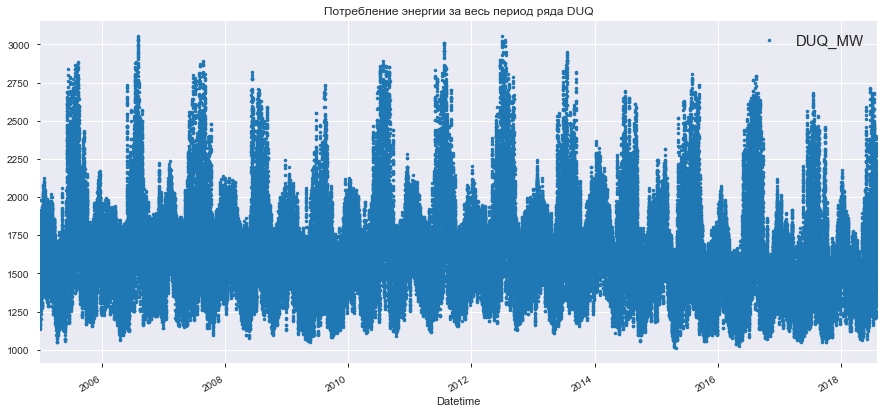

In [413]:
df.plot(style='.', figsize=(15, 7), title='Потребление энергии за весь период ряда DUQ')
plt.legend(shadow=True, fontsize=15, loc='best')
plt.show()

In [414]:
# import pandas_profiling

In [415]:
# df.profile_report()

##### Добавим колонку с датой df['date'] = df.index. В дальнейшем она понадобится для разбиения ряда на года, месяцы, недели, дни.

In [416]:
df['date'] = df.index
df.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458,2005-12-31 01:00:00
2005-12-31 02:00:00,1377,2005-12-31 02:00:00
2005-12-31 03:00:00,1351,2005-12-31 03:00:00
2005-12-31 04:00:00,1336,2005-12-31 04:00:00
2005-12-31 05:00:00,1356,2005-12-31 05:00:00


##### Найдем даты с минимальныйм и максимальным потреблением электроэнергии

In [417]:
min_value = df['DUQ_MW'].min()
df_min = df.loc[[df.query('DUQ_MW == @min_value')['DUQ_MW'].idxmin()]]
df_min

,DUQ_MW,date
Datetime,,
2015-04-27 06:00:00,1014,2015-04-27 06:00:00


In [418]:
max_value = df['DUQ_MW'].max()
df_max = df.loc[[df.query('DUQ_MW == @max_value')['DUQ_MW'].idxmax()]]
df_max

,DUQ_MW,date
Datetime,,
2012-06-29 14:00:00,3054,2012-06-29 14:00:00


##### Проверим датасет на дубликаты наблюдений и уникальные/неуникальные значения

In [419]:
df_duplicate_rows = df[df.duplicated()]
print(f'Количество задублированных наблюдений = {df_duplicate_rows.shape[0]}')

Количество задублированных наблюдений = 0


In [420]:
not_unique_quantity = df.shape[0] - df['date'].nunique()
print(f'Количество не уникальных по временной метке значений в датасете = {not_unique_quantity}')

Количество не уникальных по временной метке значений в датасете = 4


In [421]:
df_not_unique = df.loc[df['date'].value_counts() > 1]
df_not_unique

,DUQ_MW,date
Datetime,,
2014-11-02 02:00:00,1272,2014-11-02 02:00:00
2014-11-02 02:00:00,1240,2014-11-02 02:00:00
2015-11-01 02:00:00,1113,2015-11-01 02:00:00
2015-11-01 02:00:00,1138,2015-11-01 02:00:00
2016-11-06 02:00:00,1121,2016-11-06 02:00:00
2016-11-06 02:00:00,1107,2016-11-06 02:00:00
2017-11-05 02:00:00,1131,2017-11-05 02:00:00
2017-11-05 02:00:00,1105,2017-11-05 02:00:00


#### Предварительные выводы по временному ряду DUQ_MW

1. Основные статистики показали, что пропусков нет;
2. Интервал изменения индексов начинается с 2005-12-31 01:00:00 и заканчивается 2018-01-02 00:00:00;
3. Общий объем данных составляет 119068 измерений;
4. Шаг измерений по времени составляет = 1 час;
5. Минимальное значение потребления мощности = 1014 МВт. Дата события - 2015-04-27 06:00:00;
6. Максимальное значение потребления мощности = 3054 МВт. Дата события - 2012-06-29 14:00:00;
7. Визуальный анализ временного ряда показывает, что:
    - данные цикличны;
    - явных выбросов не наблюдается.
8. В датасете присутствуют задвоенные по временной метке данные в течении 4-х лет подряд (с 2014 по 2017 год):
    Т.к. все даты были в ноябре, то можно предполодить о сезонном сдвиге часов на час назад (перевод часов).
    Если предположение верное, то на пол года ранее, в датасете должны быть пропуски. Проверим это.

In [422]:
df_gaps14 = df['2014-03-01 00:00:00':'2014-03-31 23:00:00'].index.day
df_gaps15 = df['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day
df_gaps16 = df['2016-03-01 00:00:00':'2016-03-31 23:00:00'].index.day
df_gaps17 = df['2017-03-01 00:00:00':'2017-03-31 23:00:00'].index.day

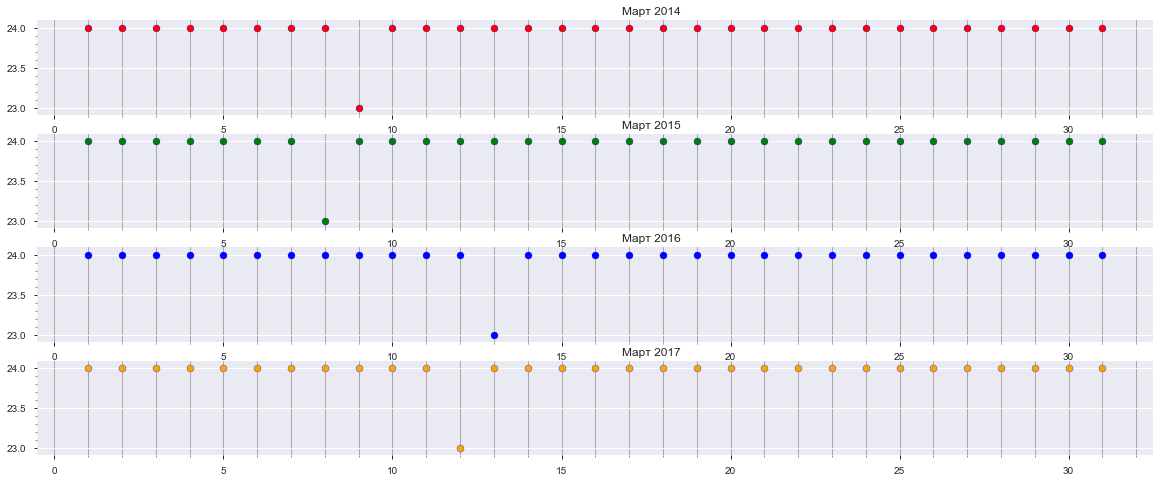

In [423]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=4, ncols=1,
    figsize=(20, 8)
)
# --year 2014 -------
ax1.scatter(x=df_gaps14.value_counts().index, y=df_gaps14.value_counts().values, marker='o', c='red', edgecolor='b')
ax1.set_title('Март 2014', x=0.55, y=1)
ax1.minorticks_on()
ax1.grid(which='both', axis = 'x', color='darkgrey')
# --year 2015 -------
ax2.scatter(x=df_gaps15.value_counts().index, y=df_gaps15.value_counts().values, marker='o', c='green', edgecolor='b')
ax2.set_title('Март 2015', x=0.55, y=1)
ax2.minorticks_on()
ax2.grid(which='both', axis = 'x', color='darkgrey')
# --year 2016 -------
ax3.scatter(x=df_gaps16.value_counts().index, y=df_gaps16.value_counts().values, marker='o', c='blue', edgecolor='b')
ax3.set_title('Март 2016', x=0.55, y=1)
ax3.minorticks_on()
ax3.grid(which='both', axis = 'x', color='darkgrey')
# --year 2017 -------
ax4.scatter(x=df_gaps17.value_counts().index, y=df_gaps17.value_counts().values, marker='o', c='orange', edgecolor='b')
ax4.set_title('Март 2017', x=0.55, y=1)
ax4.minorticks_on()
ax4.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

##### Предположение оказалось верным. В марте 2014, 2015, 2016 и 2017 годов в один из дней наблюдается 23 измерения, вместо нормальных 24 измерений, т.е. существуют пропуски. Найдет такие дни по всему датасету

In [424]:
day_count14 = df_gaps14.value_counts()
day_with_gaps14 = day_count14[day_count14 != 24].index
day_with_gaps14

Int64Index([9], dtype='int64')

##### Посмотрим на этот день поближе

In [425]:
df['2014-03-09 01:00:00':'2014-03-09 06:00:00'].index

DatetimeIndex(['2014-03-09 01:00:00', '2014-03-09 02:00:00',
               '2014-03-09 04:00:00', '2014-03-09 05:00:00',
               '2014-03-09 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

##### Видим, что между 2 и 4 часами есть пропуск.

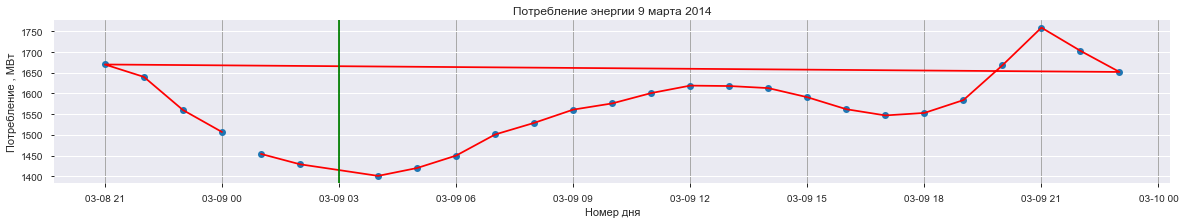

In [426]:
plt.figure(figsize=(20,3))
plt.plot(df['2014-03-08 21:00:00':'2014-03-09 23:00:00'].index,
         df['2014-03-08 21:00:00':'2014-03-09 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(df['2014-03-08 21:00:00':'2014-03-09 23:00:00'].index,
         df['2014-03-08 21:00:00':'2014-03-09 23:00:00']['DUQ_MW'].values, 'r')
plt.axvline(pd.to_datetime('2014-03-09 03:00:00'), color = 'green')
plt.xlabel('Номер дня')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии 9 марта 2014')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

In [427]:
day_count15 = df_gaps15.value_counts()
day_with_gaps15 = day_count15[day_count15 != 24].index
day_with_gaps15

Int64Index([8], dtype='int64')

In [428]:
day_count16 = df_gaps16.value_counts()
day_with_gaps16 = day_count16[day_count16 != 24].index
day_with_gaps16

Int64Index([13], dtype='int64')

In [429]:
day_count17 = df_gaps17.value_counts()
day_with_gaps17 = day_count17[day_count17 != 24].index
day_with_gaps17

Int64Index([12], dtype='int64')

##### Попробуем решить проблему пропусков. Заполним пропуски как среднее по 2-м соседними измерениям.

In [430]:
gaps_value14 = list((df['2014-03-09 02:00:00']['DUQ_MW'].values + df['2014-03-09 04:00:00']['DUQ_MW'].values) / 2)
gaps_value15 = list((df['2015-03-08 02:00:00']['DUQ_MW'].values + df['2015-03-08 04:00:00']['DUQ_MW'].values) / 2)
gaps_value16 = list((df['2016-03-13 02:00:00']['DUQ_MW'].values + df['2016-03-13 04:00:00']['DUQ_MW'].values) / 2)
gaps_value17 = list((df['2017-03-12 02:00:00']['DUQ_MW'].values + df['2017-03-12 04:00:00']['DUQ_MW'].values) / 2)
gaps_value = np.reshape([gaps_value14[0], gaps_value15[0], gaps_value16[0], gaps_value17[0]], (4, 1))

df_gaps = pd.DataFrame(index = pd.to_datetime(pd.Series(['2014-03-09 03:00:00',
                                                         '2015-03-08 03:00:00',
                                                         '2016-03-13 03:00:00',
                                                         '2017-03-12 03:00:00'])), 
                       columns = ['DUQ_MW'] , data = gaps_value)
df_gaps['date'] = df_gaps.index
df = df.append(df_gaps, sort = False)
df.tail(10)

,DUQ_MW,date
2018-01-01 19:00:00,1968.0,2018-01-01 19:00:00
2018-01-01 20:00:00,1962.0,2018-01-01 20:00:00
2018-01-01 21:00:00,1940.0,2018-01-01 21:00:00
2018-01-01 22:00:00,1891.0,2018-01-01 22:00:00
2018-01-01 23:00:00,1820.0,2018-01-01 23:00:00
2018-01-02 00:00:00,1721.0,2018-01-02 00:00:00
2014-03-09 03:00:00,1415.0,2014-03-09 03:00:00
2015-03-08 03:00:00,1394.5,2015-03-08 03:00:00
2016-03-13 03:00:00,1111.5,2016-03-13 03:00:00
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00


##### Избавимся от дублированных значений в ноябре 2014, 2015, 2016 и 2017 годов.

In [431]:
df_not_unique_ = df_not_unique.groupby('date').mean()

In [432]:
df_not_unique_['date'] = df_not_unique_.index
df_not_unique_

,DUQ_MW,date
date,,
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00
2017-11-05 02:00:00,1118.0,2017-11-05 02:00:00


In [433]:
df.drop(df_not_unique.index, inplace=True)

In [434]:
df = df.append(df_not_unique_, sort = False)

In [435]:
df

,DUQ_MW,date
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00
...,...,...
2017-03-12 03:00:00,1454.0,2017-03-12 03:00:00
2014-11-02 02:00:00,1256.0,2014-11-02 02:00:00
2015-11-01 02:00:00,1125.5,2015-11-01 02:00:00
2016-11-06 02:00:00,1114.0,2016-11-06 02:00:00


In [436]:
not_unique_quantity = df.shape[0] - df['date'].nunique()
print(f'Количество не уникальных по временной метке значений в датасете = {not_unique_quantity}')

Количество не уникальных по временной метке значений в датасете = 0


##### Теперь все значения в датасете уникальные, пропуски отсутствуют.

In [437]:
df = df.sort_index()

##### Нарисуем графики потребления электроэнергии выборочно 1/2 месяца каждого года

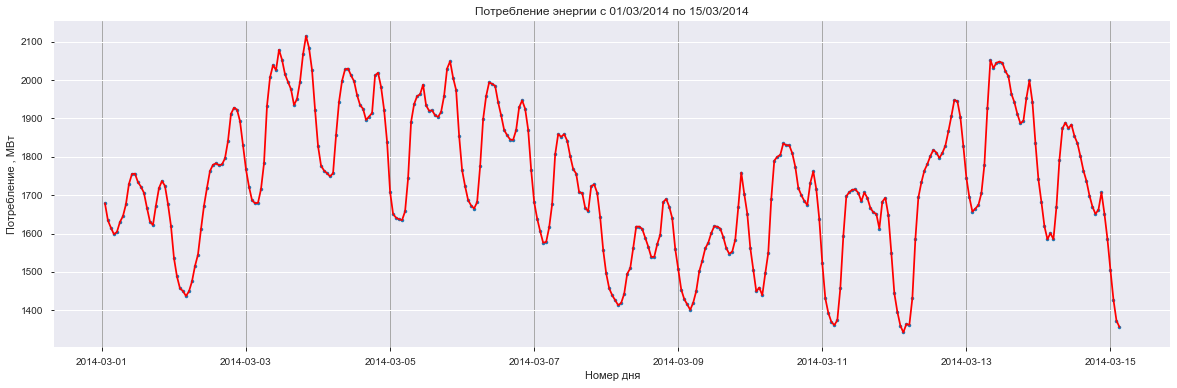

In [438]:
plt.figure(figsize=(20,6))
plt.plot(df['2014-03-01 01:00:00':'2014-03-15 03:00:00'].index,
         df['2014-03-01 01:00:00':'2014-03-15 03:00:00']['DUQ_MW'].values, '.')
plt.plot(df['2014-03-01 01:00:00':'2014-03-15 03:00:00'].index,
         df['2014-03-01 01:00:00':'2014-03-15 03:00:00']['DUQ_MW'].values, 'r')
plt.xlabel('Номер дня')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии с 01/03/2014 по 15/03/2014')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

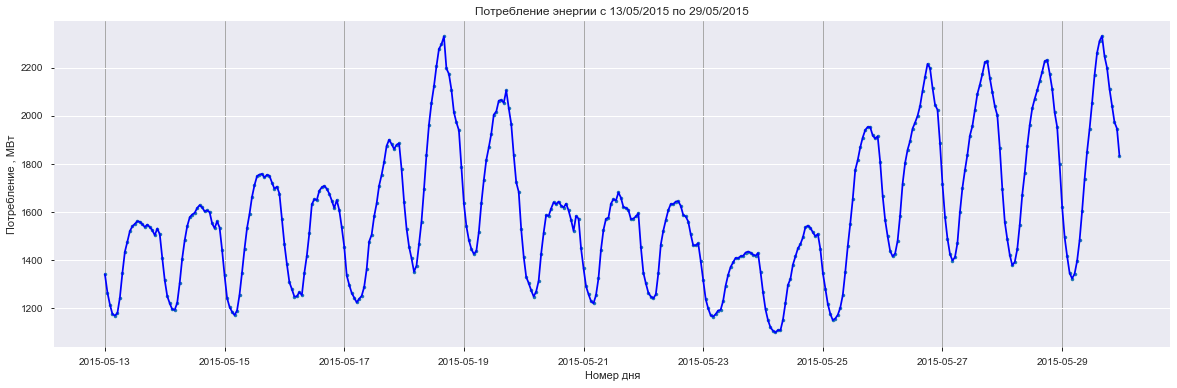

In [439]:
plt.figure(figsize=(20,6))
plt.plot(df['2015-05-13 00:00:00':'2015-05-29 23:00:00'].index,
         df['2015-05-13 00:00:00':'2015-05-29 23:00:00']['DUQ_MW'].values, '.')
plt.plot(df['2015-05-13 00:00:00':'2015-05-29 23:00:00'].index,
         df['2015-05-13 00:00:00':'2015-05-29 23:00:00']['DUQ_MW'].values, 'b')
plt.xlabel('Номер дня')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии с 13/05/2015 по 29/05/2015')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

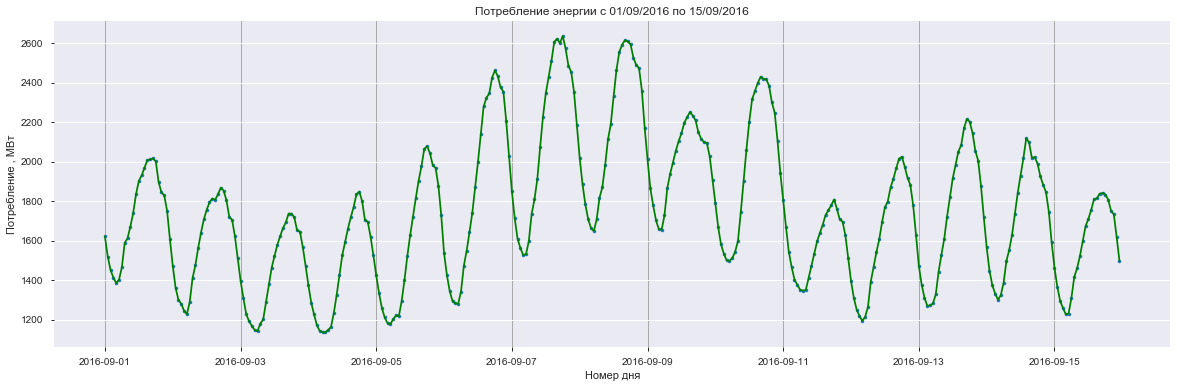

In [440]:
plt.figure(figsize=(20,6))
plt.plot(df['2016-09-01 00:00:00':'2016-09-15 23:00:00'].index,
         df['2016-09-01 00:00:00':'2016-09-15 23:00:00']['DUQ_MW'].values, '.')
plt.plot(df['2016-09-01 00:00:00':'2016-09-15 23:00:00'].index,
         df['2016-09-01 00:00:00':'2016-09-15 23:00:00']['DUQ_MW'].values, 'g')
plt.xlabel('Номер дня')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии с 01/09/2016 по 15/09/2016')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

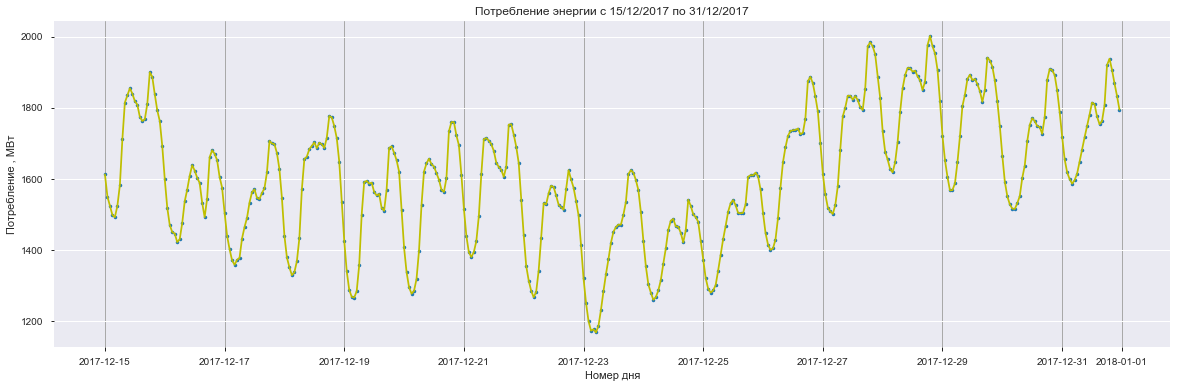

In [441]:
plt.figure(figsize=(20,6))
plt.plot(df['2017-12-15 00:00:00':'2017-12-31 23:00:00'].index,
         df['2017-12-15 00:00:00':'2017-12-31 23:00:00']['DUQ_MW'].values, '.')
plt.plot(df['2017-12-15 00:00:00':'2017-12-31 23:00:00'].index,
         df['2017-12-15 00:00:00':'2017-12-31 23:00:00']['DUQ_MW'].values, 'y')
plt.xlabel('Номер дня')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии с 15/12/2017 по 31/12/2017')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

#### Выводы по временному ряду DUQ_MW:
1. Выбросов не обнаружено;
2. Пропуски заполнены средними значениями соседних измерений. 
3. Зависимость имеет сезонные циклы и суточные циклы.

### Задача №3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям, по месяцам.

In [467]:
df = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
df.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [468]:
df['date'] = df_brent.index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 2 columns):
Значение    2667 non-null float64
date        2667 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.5 KB


##### Построим график временного ряда нефти brent

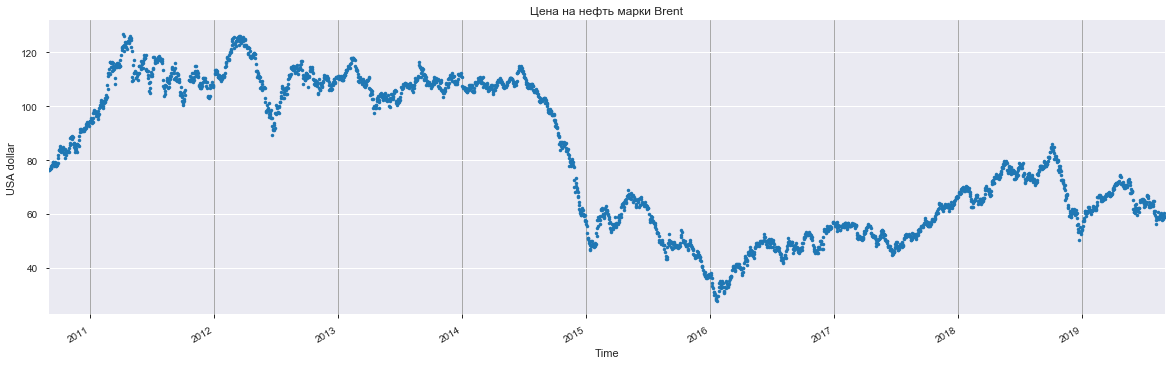

In [469]:
_ = df['Значение'].plot(style='.', figsize=(20, 6), title='Цена на нефть марки Brent')
plt.xlabel('Time')
plt.ylabel('Price, $USA')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

##### Проверим датасен brent на нулевые значения

In [471]:
df[df['Значение'].isnull()].count()

Значение    0
date        0
dtype: int64

##### Переименуем столбец "Значение"

In [473]:
df.rename(columns={'Значение': 'Price'}, inplace=True)

##### Произведем ресэмплинг данных в представлении по неделям, месяцам и годам. Для ресамплинга выберем метод среднего значения по временному ряду - mean

In [497]:
df_rweek_mean = df['Price'].resample('W').mean()
df_rweek_mean.head()

Дата
2010-09-05    76.616000
2010-09-12    77.673333
2010-09-19    78.693333
2010-09-26    78.518333
2010-10-03    81.211667
Freq: W-SUN, Name: Price, dtype: float64

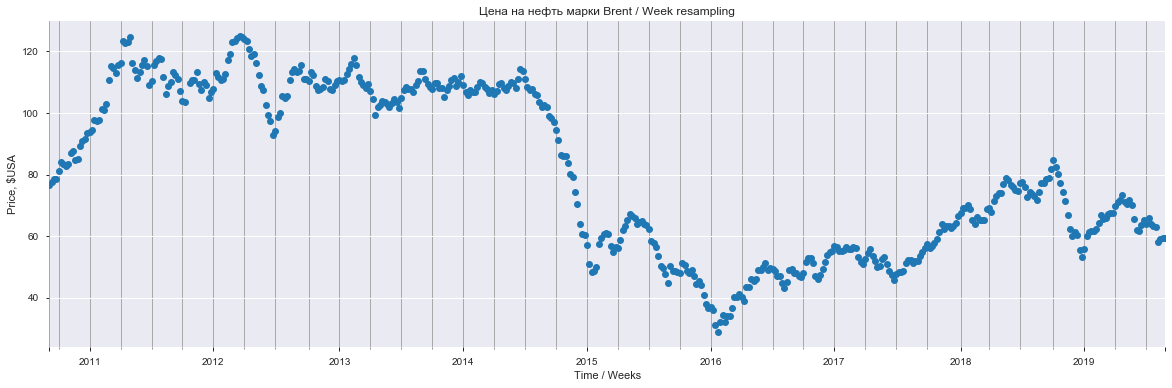

In [487]:
_ = df_rweek_mean.plot(style='.', figsize=(20, 6), title='Цена на нефть марки Brent / Week resampling', marker='o')
plt.xlabel('Time / Weeks')
plt.ylabel('Price, $USA')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

In [488]:
df_rmonth_mean = df['Price'].resample('M').mean()
df_rmonth_mean.head()

Дата
2010-09-30    78.228148
2010-10-31    83.473462
2010-11-30    86.178077
2010-12-31    92.232308
2011-01-31    97.033200
Freq: M, Name: Price, dtype: float64

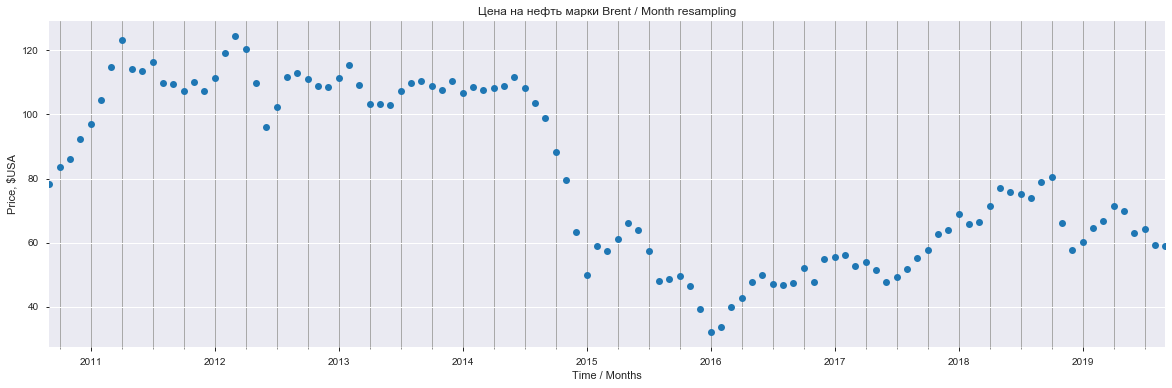

In [489]:
_ = df_rmonth_mean.plot(style='.', figsize=(20, 6), title='Цена на нефть марки Brent / Month resampling',  marker='o')
plt.xlabel('Time / Months')
plt.ylabel('Price, $USA')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

In [490]:
df_ryear_mean = df['Price'].resample('Y').mean()
df_ryear_mean.head()

Дата
2010-12-31     84.963238
2011-12-31    110.758746
2012-12-31    111.377484
2013-12-31    108.137114
2014-12-31     99.435493
Freq: A-DEC, Name: Price, dtype: float64

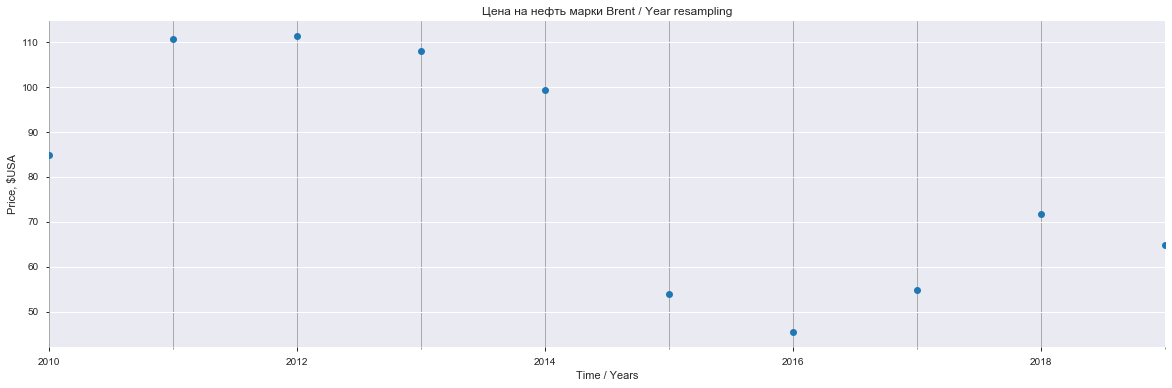

In [491]:
_ = df_ryear_mean.plot(style='.', figsize=(20, 6), title='Цена на нефть марки Brent / Year resampling',  marker='o')
plt.xlabel('Time / Years')
plt.ylabel('Price, $USA')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.show()

### Задача 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

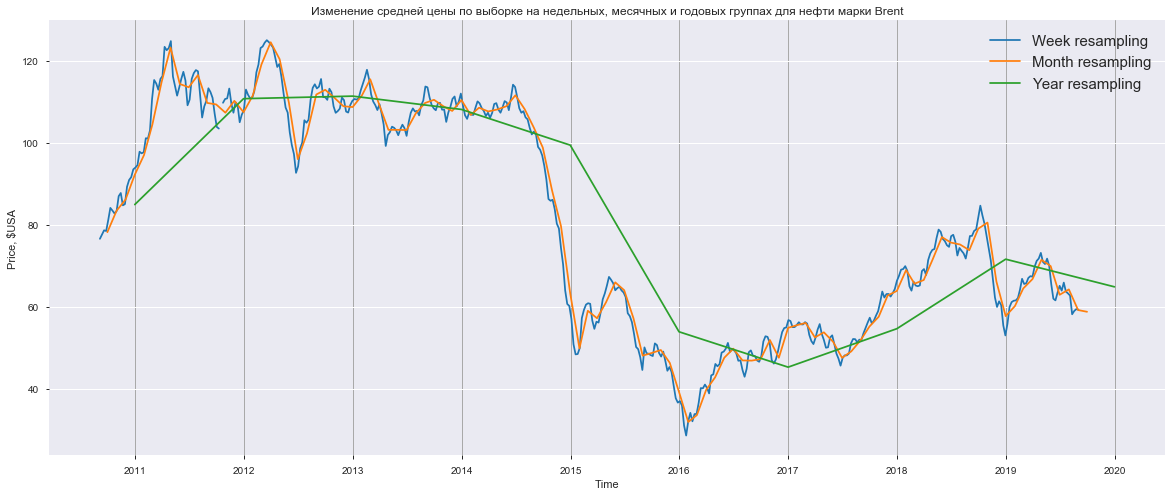

In [496]:
plt.figure(figsize=(20, 8))
plt.plot(df_rweek_mean, label = 'Week resampling (mean)')
plt.plot(df_rmonth_mean, label = 'Month resampling (mean)')
plt.plot(df_ryear_mean, label = 'Year resampling (mean)')
plt.xlabel('Time')
plt.ylabel('Price, $USA')
plt.title('Изменение средней цены по выборке на недельных, месячных и годовых группах для нефти марки Brent')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.legend(fontsize = 15)
plt.show()

In [498]:
df_rweek_std = df['Price'].resample('W').std()
df_rweek_std.head()

Дата
2010-09-05    0.185688
2010-09-12    0.649759
2010-09-19    0.539728
2010-09-26    0.596068
2010-10-03    2.408588
Freq: W-SUN, Name: Price, dtype: float64

In [499]:
df_rmonth_std = df['Price'].resample('M').std()
df_rmonth_std.head()

Дата
2010-09-30    1.294269
2010-10-31    0.898559
2010-11-30    1.753625
2010-12-31    1.443311
2011-01-31    1.842147
Freq: M, Name: Price, dtype: float64

In [500]:
df_ryear_std = df['Price'].resample('Y').std()
df_ryear_std.head()

Дата
2010-12-31     5.269065
2011-12-31     7.021114
2012-12-31     7.777702
2013-12-31     4.014836
2014-12-31    14.512923
Freq: A-DEC, Name: Price, dtype: float64

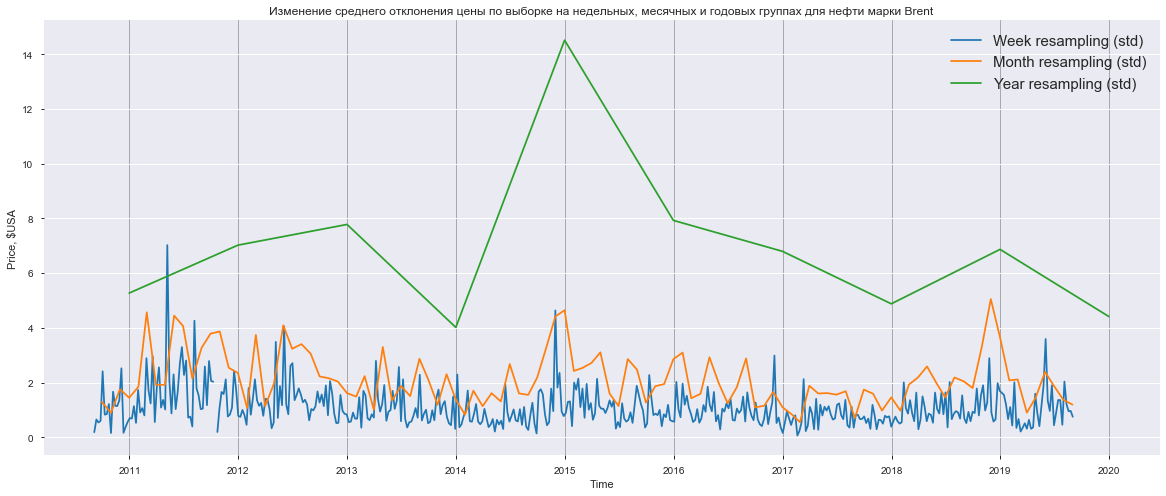

In [501]:
plt.figure(figsize=(20, 8))
plt.plot(df_rweek_std, label = 'Week resampling (std)')
plt.plot(df_rmonth_std, label = 'Month resampling (std)')
plt.plot(df_ryear_std, label = 'Year resampling (std)')
plt.xlabel('Time')
plt.ylabel('Price, $USA')
plt.title('Изменение среднего отклонения цены по выборке на недельных, месячных и годовых группах для нефти марки Brent')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.legend(fontsize = 15)
plt.show()

### Задача №5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

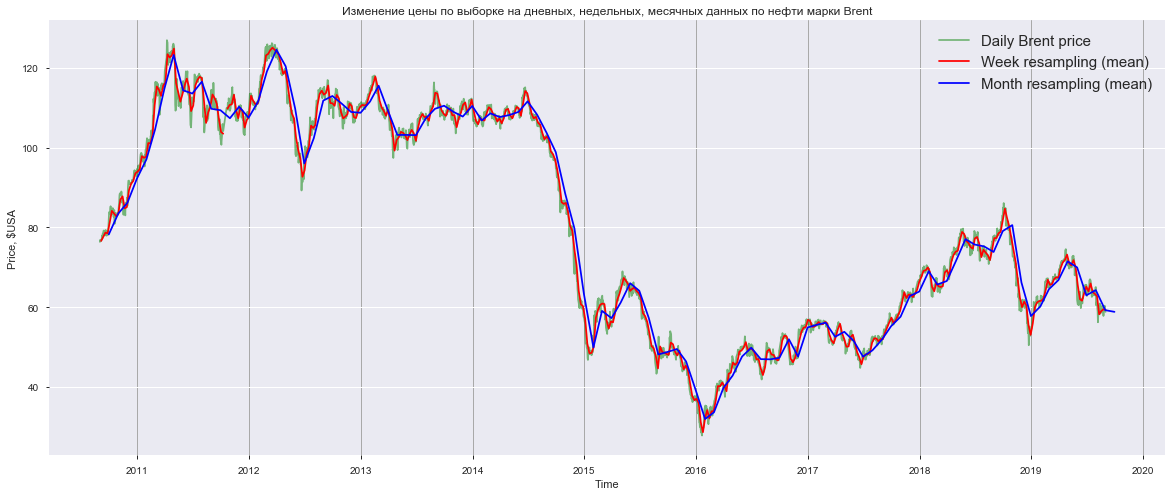

In [510]:
plt.figure(figsize=(20, 8))
plt.plot(df['Price'], label = 'Daily Brent price', color='green', alpha=0.5)
plt.plot(df_rweek_mean, label = 'Week resampling (mean)', color='red')
plt.plot(df_rmonth_mean, label = 'Month resampling (mean)', color='blue')
plt.xlabel('Time')
plt.ylabel('Price, $USA')
plt.title('Изменение цены по выборке на дневных, недельных, месячных данных по нефти марки Brent')
plt.grid(which='both', axis = 'x', color='darkgrey')
plt.legend(fontsize = 15)
plt.show()

#### Вывод: по сравнению с дневными,  недельный и месячный графики выглядят менее шумными, на них проще увидеть сезонную динамику изменения цен. Недельный и месячный графики более сглаженные. На месячном графике уже явно видно запаздывание (что характерно для скользящих средних), что негативно может сказаться на предсказании.

#### Ресемплинг позволил нам избавится от выбросов и уменьшил колебания временного ряда. Также после ресемплинга более явно проявился тренд.